## USANDO DATASET "02_desastres_colsreducidas.csv"

### IMPORTAR LIBRERIAS

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar base de datos: 02_desastres_colsreducidas.csv

In [91]:
df = pd.read_csv('../../Data/02ParaLimpiar/02desastres_paralimpiar.csv', delimiter=';', encoding='utf-8')
df.head(3)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,AID Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,End Year,End Month,CPI
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,NaN,Km2,NaN,NaN,1900,NaN,1900,NaN,"2,849084409"
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,NaN,Km2,NaN,NaN,1900,NaN,1900,NaN,"2,849084409"
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,NaN,8.0,Richter,14,-91,1902,4.0,1902,4.0,"2,963047785"


# ANALISIS DATASET DESASTRES NATURALES


### DESCRIPCIÓN DE COLUMNAS:

Nivel 1 – Evento de desastre

Disaster number: Se genera un número de desastre único de 8 dígitos para cada evento de desastre. El "DisN°" incluye el año (4 dígitos) y un número secuencial (4 dígitos) que es único para cada evento de desastre (es decir, Tsunami 2004 = DisN° 2004-0659).

Year: Año de ocurrencia del desastre

Seq: número secuencial(4 dígitos) que es único para cada evento de desastre

Disaster Subgroup: La categoría de desastres naturales se divide en 6 subgrupos: desastres biológicos, geofísicos, climatológicos, hidrológicos, meteorológicos y extraterrestres.

Disaster Type: se identifica 1 tipo de desastre principal por evento. Este campo se vincula automáticamente al subgrupo de desastres y al grupo de desastres. Dos o más desastres pueden estar relacionados (un desastre puede ocurrir como consecuencia de un evento primario). Por ejemplo, un ciclón puede generar una inundación o un deslizamiento de tierra; o un terremoto puede causar la ruptura de una línea de gas, causando un desastre ecológico. El tipo de desastre principal (o evento desencadenante) se registra primero, seguido de los campos Desastre asociado 1 y 2 por los secundarios.

Disaster Subtype: Subdivisión relacionada con el tipo de desastre.

Nivel 2 – País/países

Información geográfica

Country: El país en el que el desastre ha ocurrido o ha tenido un impacto; con el nombre y la ortografía tomados de la lista estándar de nombres de países publicada por la Organización Internacional de Normalización (ISO). Si un desastre ha afectado a más de un país, habrá una entrada para cada país.

Código ISO: La Organización Internacional de Normalización atribuye un código de 3 letras a cada país. CRED utiliza la norma ISO 3166. Este campo se vincula automáticamente al país.

Region: La región a la que pertenece el país. Este campo se vincula automáticamente al país. CRED utiliza la división regional de la ONU.

Continent: El continente al que pertenece el país. Este campo se vincula automáticamente al país.

Location: Especificación geográfica (por ejemplo, nombre de una ciudad, pueblo, departamento, provincia, estado o distrito). Esto permite el análisis posterior de la ocurrencia de desastres y el impacto por región, distrito o cualquier otro límite administrativo subnacional.

Latitude: coordenadas norte-sur; cuando esté disponible (utilizado para terremotos, volcanes e inundaciones)

Longitude: Coordenadas Este-Oeste; cuando esté disponible (utilizado para terremotos, volcanes e inundaciones)

Ubicación: 

Información temporal

Start year/start month: La fecha en que ocurrió el desastre. Esta fecha está bien definida para todos los desastres de impacto repentino. Para situaciones de desastre que se desarrollan gradualmente durante un período de tiempo más largo (es decir, sequía) sin fecha de inicio, el campo « día » puede dejarse en blanco.

End year/end month: La fecha en que terminó el desastre. Esta fecha está bien definida para todos los desastres de impacto repentino. Para situaciones de desastre que terminan durante un período de tiempo más largo (es decir, sequía) sin una fecha de conclusión definida, el campo « día » puede dejarse en blanco.



Características físicas

Origin: El origen desencadenante del desastre (es decir, fuertes lluvias para una inundación, sequía para un incendio forestal).

Associated Disaster 1 y 2: Los efectos o consecuencias secundarios y / o asociados de un evento primario (es decir, deslizamiento de tierra por una inundación, explosión después de un terremoto, etc ...)

Disaster Magnitude Value/Scale: La "intensidad" de un desastre específico (la unidad se vincula automáticamente al tipo de desastre)

Terremoto: Escala de Richter 
Inundación: Km² (área cubierta) Sequía : Km² (área cubierta) Infestación de insectos: Km² (área cubierta) 
Temperatura extrema: °C (valor mínimo o máximo) 
Epidemia: Número de vacunados
Incendio forestal: Km2 (área cubierta)
Tormenta: kph (velocidad del viento)
Radiación: curies
Derrame químico: m³

Estado

AID Contribution: El monto total (expresado en valor corriente en 000 dólares EE.UU., es decir, el valor en el momento del informe) de la contribución para actividades inmediatas de socorro entregada al país como respuesta al desastre (utilizando el Sistema de Seguimiento Financiero de la OCAH a partir de 1992).

OFDA Response: Si la OFDA respondió o no al desastre.

Appeal: ¿Hubo alguna solicitud de asistencia internacional del país o países afectados y cuándo se solicitó?

Declaration: ¿Se declaró un estado de emergencia en el país (s) y cuándo se declaró?

## TAMAÑO DATASET E INFORMACIÓN BÁSICA

In [92]:
df.shape

(16636, 27)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16636 entries, 0 to 16635
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dis No             16636 non-null  object 
 1   Year               16636 non-null  int64  
 2   Seq                16636 non-null  int64  
 3   Disaster Subgroup  16636 non-null  object 
 4   Disaster Type      16636 non-null  object 
 5   Disaster Subtype   13313 non-null  object 
 6   Country            16636 non-null  object 
 7   ISO                16636 non-null  object 
 8   Region             16636 non-null  object 
 9   Continent          16636 non-null  object 
 10  Location           14825 non-null  object 
 11  Origin             4085 non-null   object 
 12  Associated Dis     3593 non-null   object 
 13  Associated Dis2    763 non-null    object 
 14  OFDA Response      1716 non-null   object 
 15  Appeal             2559 non-null   object 
 16  Declaration        334

### Nulos del dataset

In [94]:
df.isnull().sum()

Dis No                   0
Year                     0
Seq                      0
Disaster Subgroup        0
Disaster Type            0
Disaster Subtype      3323
Country                  0
ISO                      0
Region                   0
Continent                0
Location              1811
Origin               12551
Associated Dis       13043
Associated Dis2      15873
OFDA Response        14920
Appeal               14077
Declaration          13293
AID Contribution     15860
Dis Mag Value        11572
Dis Mag Scale         1220
Latitude             13861
Longitude            13861
Start Year               0
Start Month            395
End Year                 0
End Month              700
CPI                    106
dtype: int64

<Axes: >

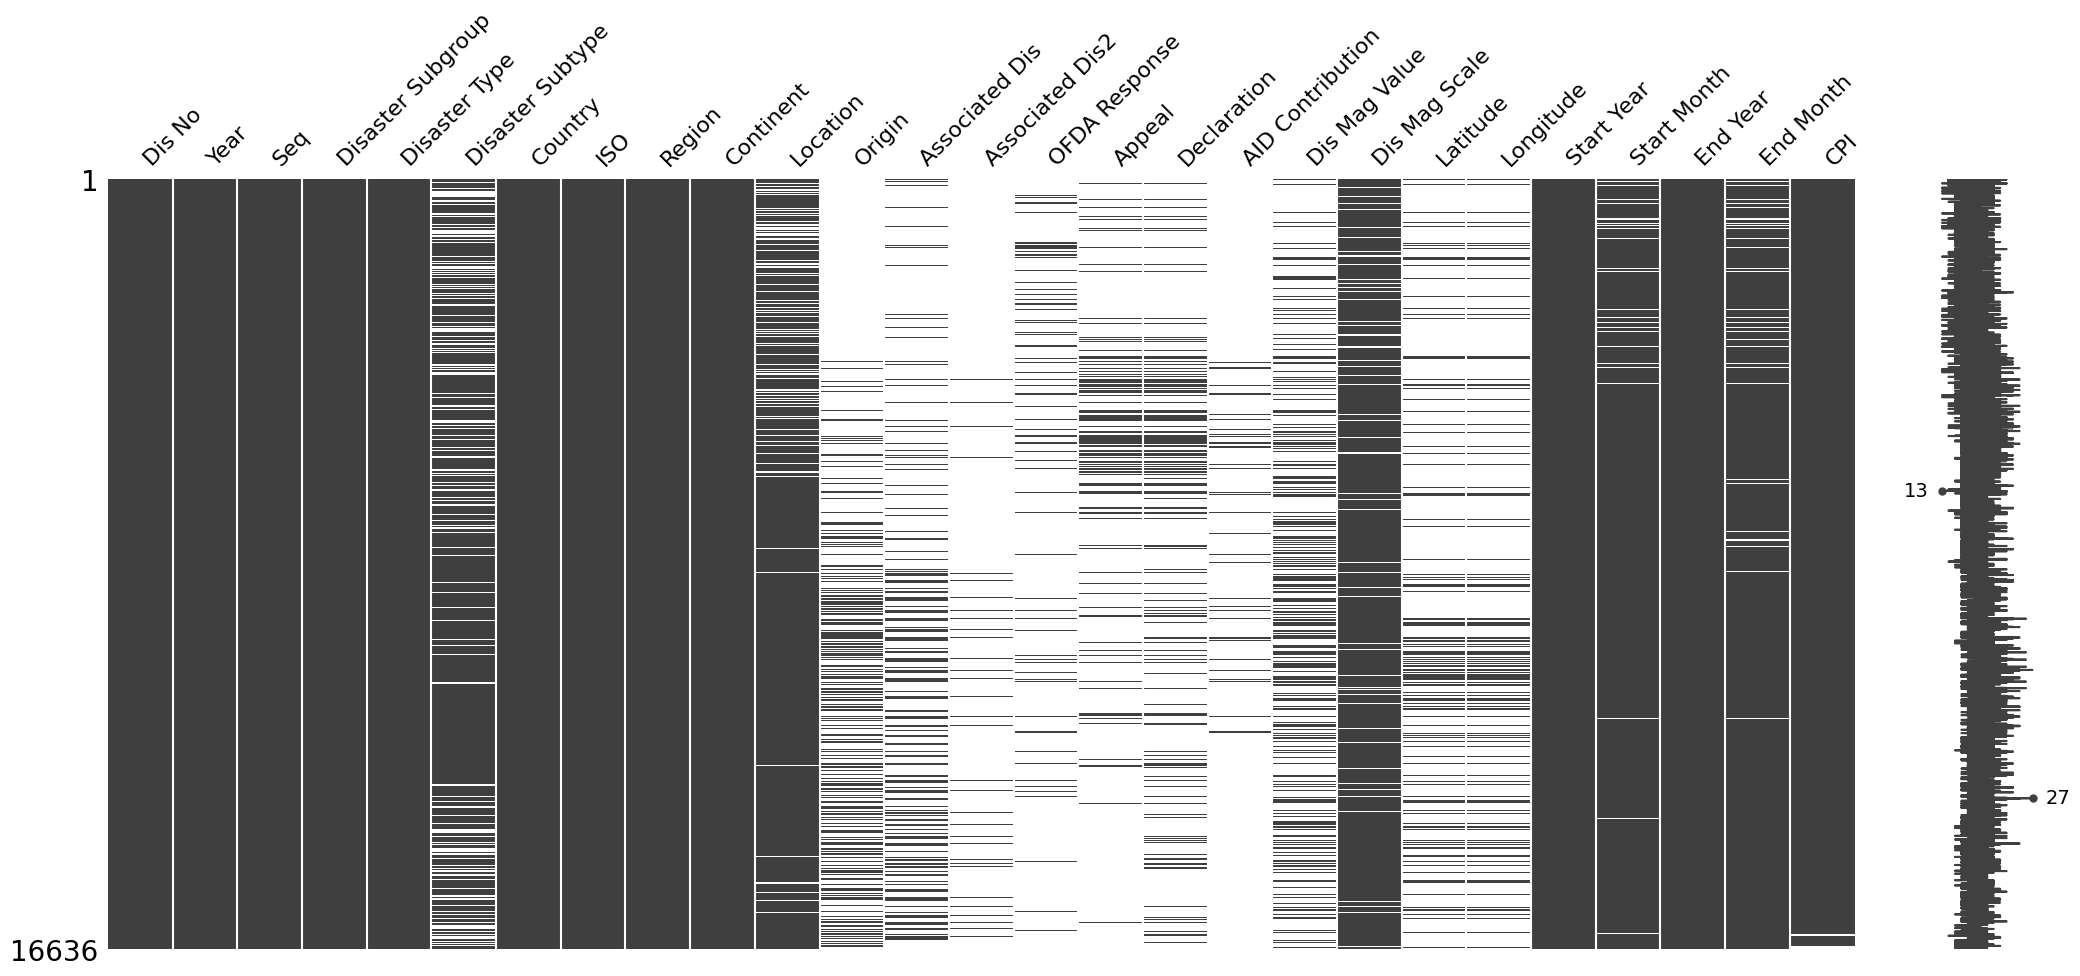

In [95]:
import missingno as msno
%matplotlib inline
msno.matrix(df)

## 1. ANÁLISIS UNIVARIANTE


### 1.1. YEAR

In [96]:
a = df['Year'].value_counts().sort_values(ascending=False)
a

2002    532
2000    523
2005    496
2007    447
2001    446
       ... 
1908      3
1907      3
1916      3
1921      2
1901      2
Name: Year, Length: 124, dtype: int64

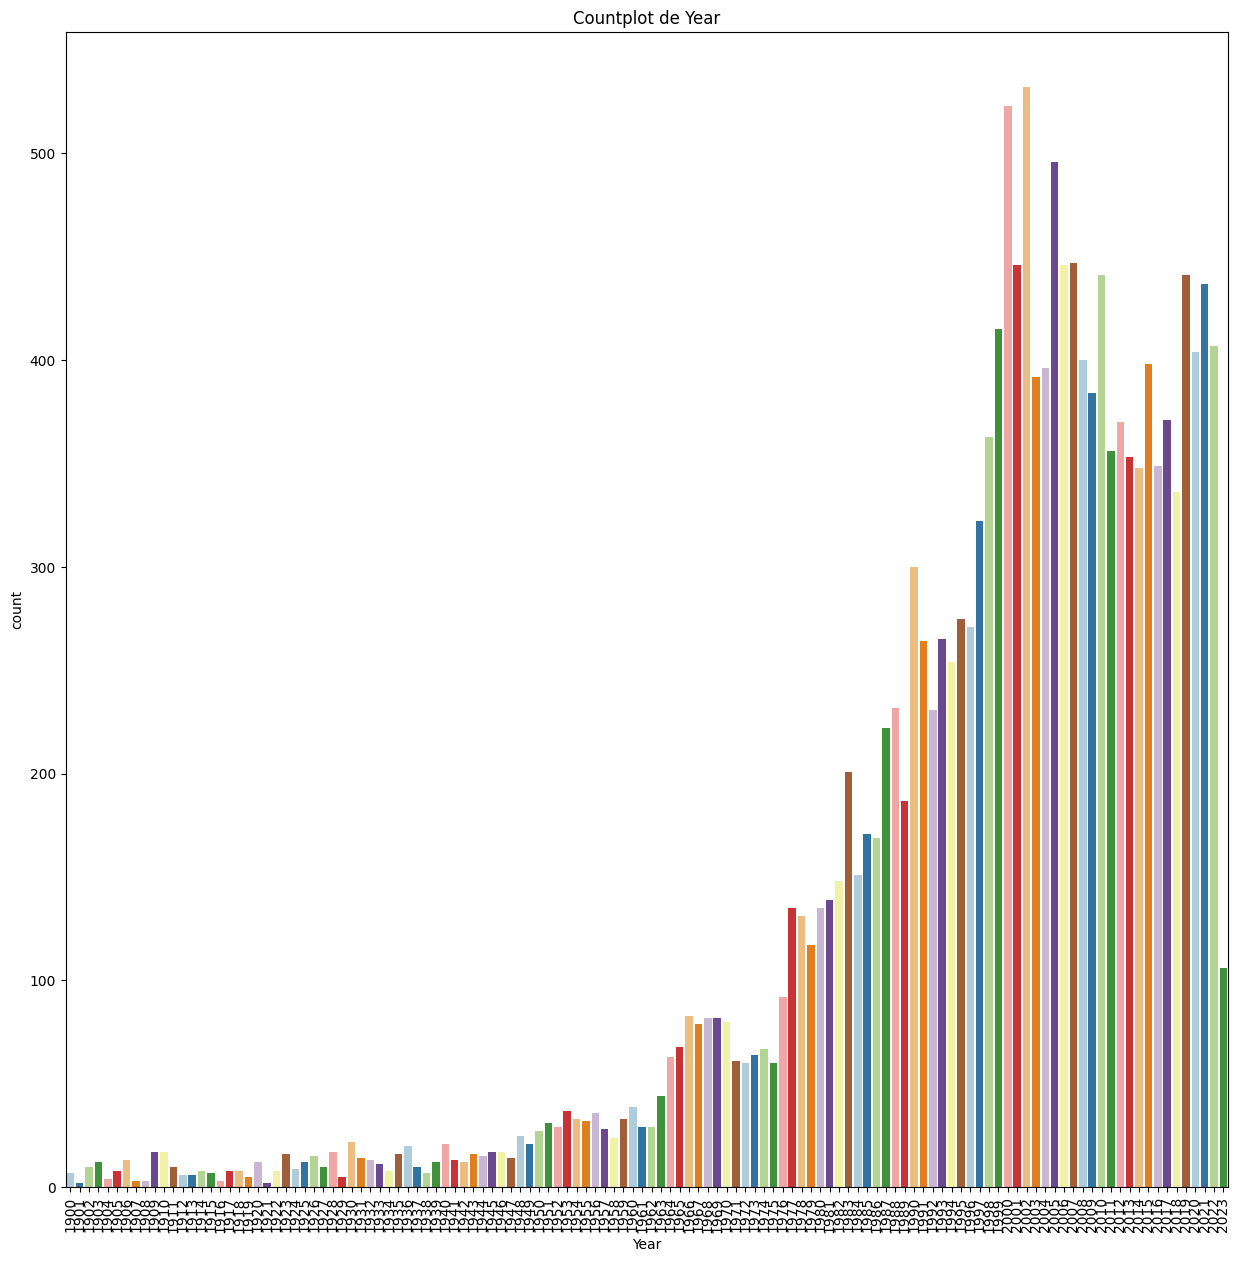

In [97]:
plt.figure(figsize=(15,15))
sns.countplot(data=df, x='Year', palette='Paired')
plt.xticks(rotation=90)
plt.title('Countplot de Year')
plt.show();

### 1.2. DISASTER SUBGROUP

In [98]:
disaster_subgroup = df['Disaster Subgroup'].unique()
print('Subgrupos de desastres naturales reportados:\n\n', disaster_subgroup)

print('Conteo de subgrupos:\n\n', df['Disaster Subgroup'].value_counts())

Subgrupos de desastres naturales reportados:

 ['Climatological' 'Geophysical' 'Meteorological' 'Hydrological'
 'Biological' 'Extra-terrestrial']
Conteo de subgrupos:

 Hydrological         6612
Meteorological       5235
Geophysical          1912
Biological           1614
Climatological       1262
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64


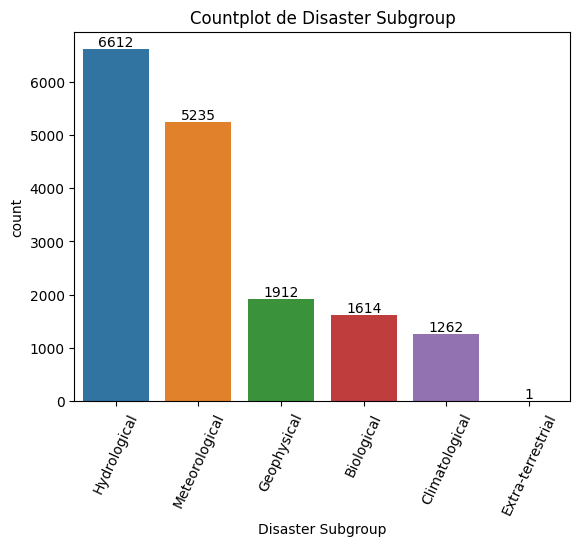

In [99]:
order = df['Disaster Subgroup'].value_counts(ascending=False).index
ax = sns.countplot(data = df, x ='Disaster Subgroup', order=order)
plt.xticks(rotation=65)
plt.title('Countplot de Disaster Subgroup')
ax.bar_label(ax.containers[0]); 

### 1.3. DISASTER TYPE


In [100]:
disaster_type = df['Disaster Type'].unique()
print('tipos de desastres naturales reportados:\n', disaster_type)
print('Conteo de tipos de desastres:\n\n', df['Disaster Type'].value_counts())

tipos de desastres naturales reportados:
 ['Drought' 'Earthquake' 'Volcanic activity' 'Mass movement (dry)' 'Storm'
 'Flood' 'Epidemic' 'Landslide' 'Wildfire' 'Extreme temperature' 'Fog'
 'Insect infestation' 'Impact' 'Animal accident' 'Glacial lake outburst']
Conteo de tipos de desastres:

 Flood                    5808
Storm                    4618
Earthquake               1597
Epidemic                 1518
Landslide                 804
Drought                   803
Extreme temperature       616
Wildfire                  456
Volcanic activity         270
Insect infestation         95
Mass movement (dry)        45
Glacial lake outburst       3
Fog                         1
Impact                      1
Animal accident             1
Name: Disaster Type, dtype: int64


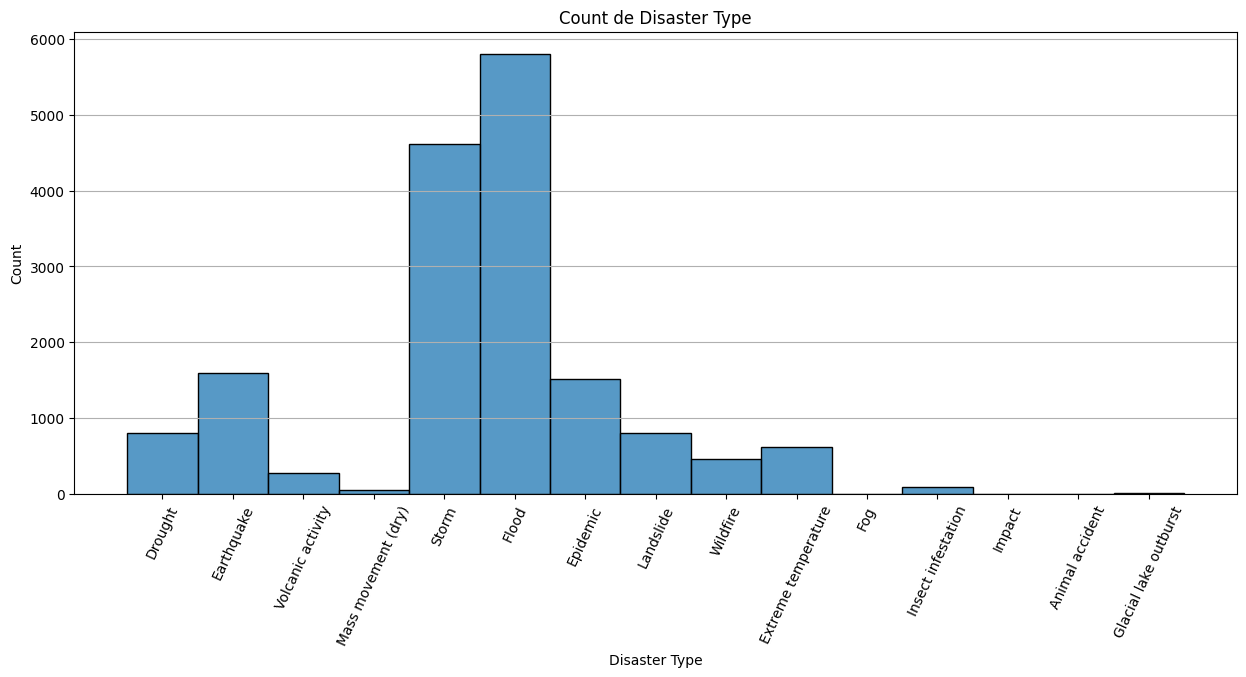

In [101]:
plt.figure(figsize=(15,6))
sns.histplot(df['Disaster Type'])
plt.xticks(rotation=65)
plt.title('Count de Disaster Type')
plt.grid(axis='y');

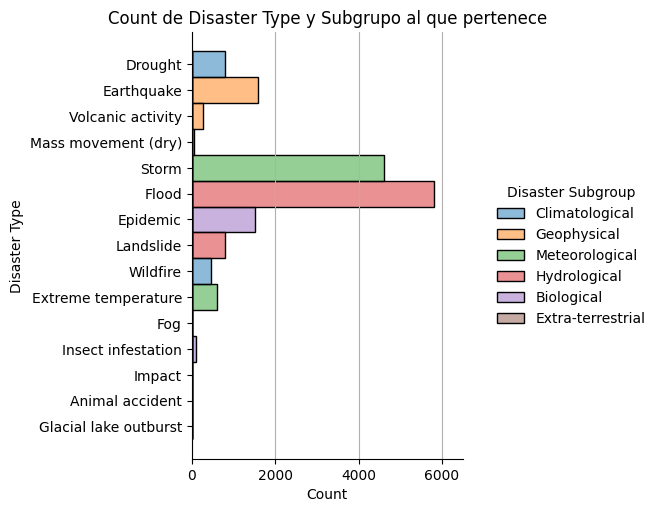

In [102]:
sns.displot (df, y ='Disaster Type', hue= 'Disaster Subgroup')
plt.xlim(0, 6500)
plt.title('Count de Disaster Type y Subgrupo al que pertenece')
plt.grid(axis='x');

### 1.4. DISASTER SUBTYPE


In [103]:
disaster_subtype = df['Disaster Subtype'].unique()
print('Subtipos de desastres naturales reportados:\n', disaster_subtype)
print('Conteo de subtipos de desastres:\n\n', df['Disaster Subtype'].value_counts())

Subtipos de desastres naturales reportados:
 ['Drought' 'Ground movement' 'Ash fall' 'Rockfall' 'Tropical cyclone' nan
 'Bacterial disease' 'Landslide' 'Avalanche' 'Forest fire'
 'Riverine flood' 'Convective storm' 'Viral disease' 'Mudslide' 'Tsunami'
 'Heat wave' 'Land fire (Brush, Bush, Pasture)' 'Coastal flood'
 'Cold wave' 'Flash flood' 'Parasitic disease' 'Locust' 'Worms'
 'Severe winter conditions' 'Grasshopper' 'Subsidence'
 'Extra-tropical storm' 'Lava flow' 'Pyroclastic flow']
Conteo de subtipos de desastres:

 Riverine flood                      2657
Tropical cyclone                    2475
Ground movement                     1540
Convective storm                    1180
Flash flood                          822
Drought                              802
Bacterial disease                    781
Landslide                            587
Viral disease                        544
Forest fire                          314
Cold wave                            310
Ash fall               

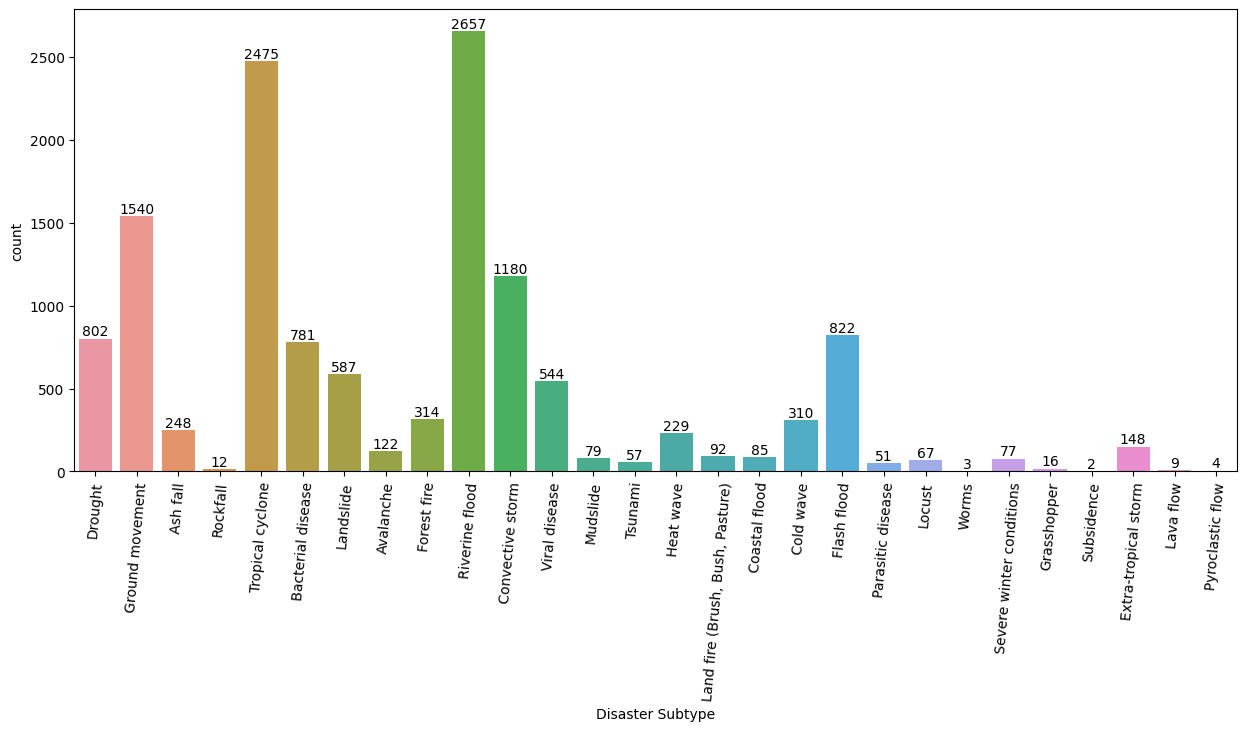

In [104]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data = df, x ='Disaster Subtype')
plt.xticks(rotation=85)
ax.bar_label(ax.containers[0]); 

### 1.5. COUNTRY

In [105]:
country= df['Country'].unique()

print('Conteo de desastres por paises:\n\n', df['Country'].value_counts())

Conteo de desastres por paises:

 United States of America (the)    1131
China                              994
India                              760
Philippines (the)                  684
Indonesia                          610
                                  ... 
Qatar                                1
Saint Barthï¿½lemy                   1
Saint Martin (French Part)           1
Sint Maarten (Dutch part)            1
Isle of Man                          1
Name: Country, Length: 228, dtype: int64


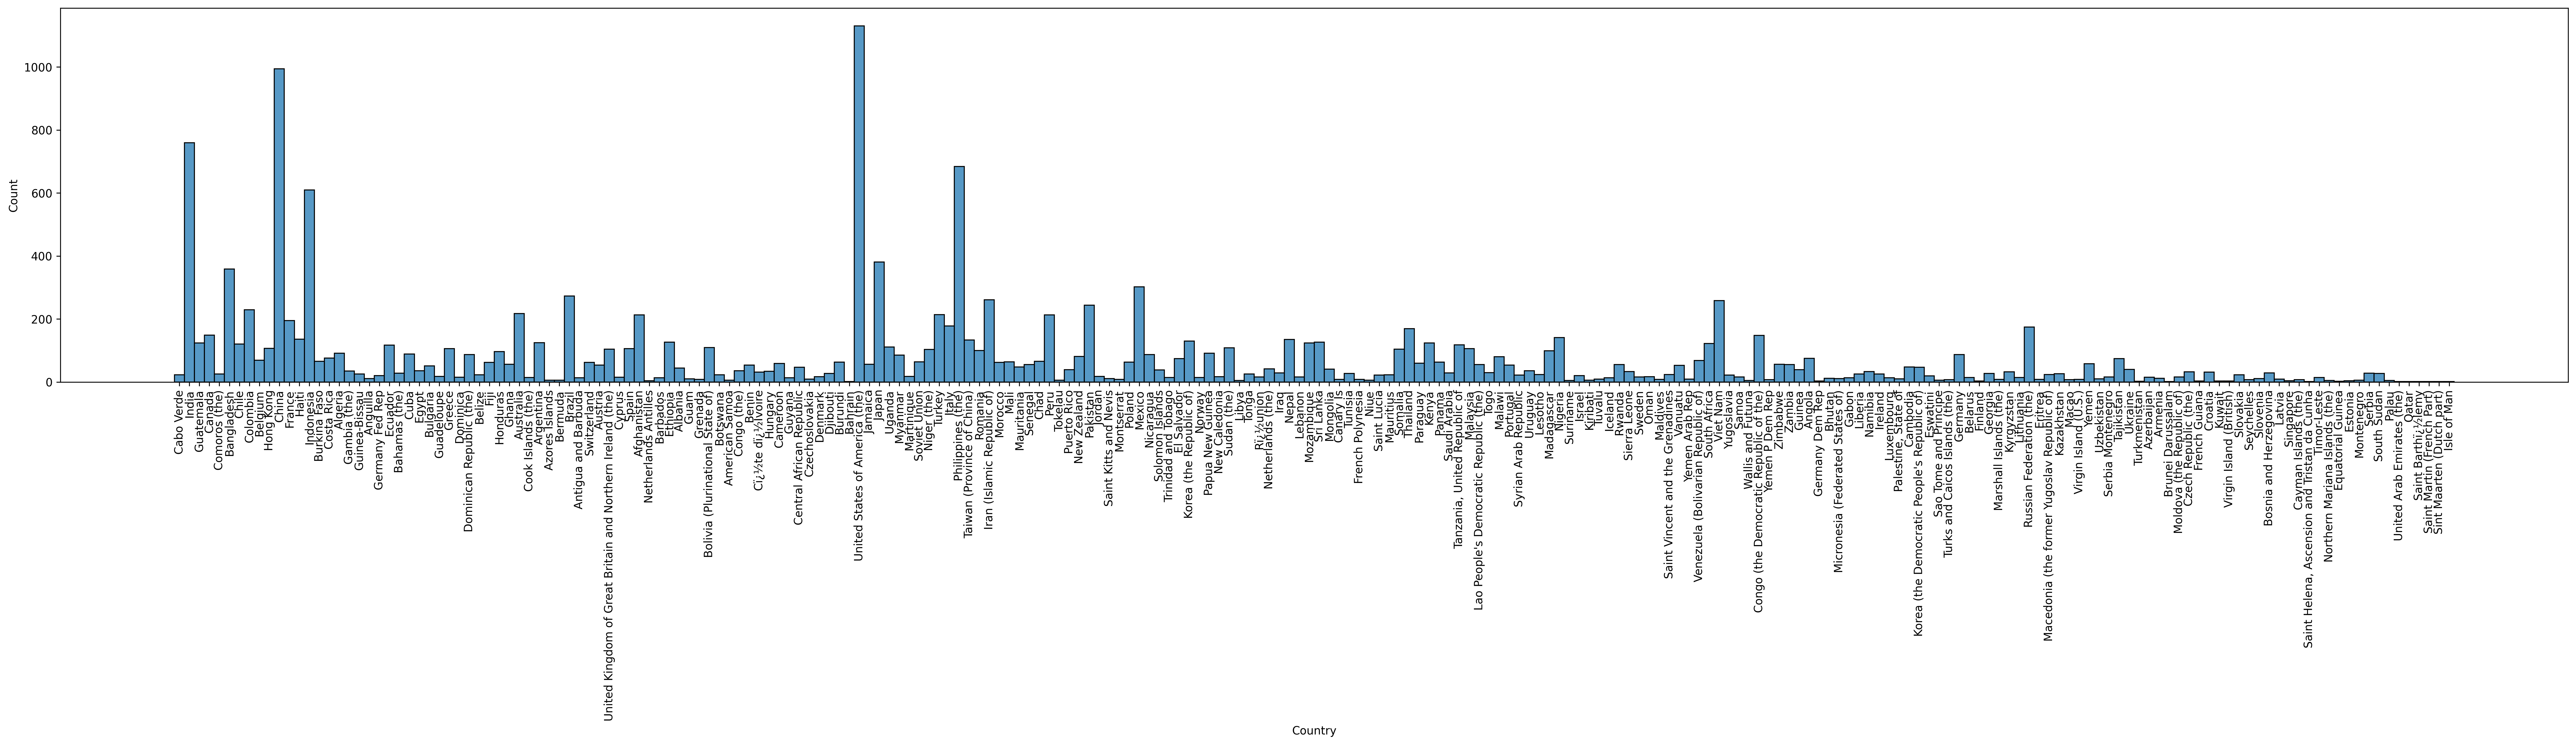

In [106]:
plt.figure(figsize=(40,6), dpi=300)
sns.histplot(df['Country'])
plt.xticks(rotation=90);

### 1.6. REGION

In [107]:
region= df['Region'].unique()
print('Regiones afectadas por desastres:', region)

print('Conteo de desastres por regiones:\n\n', df['Region'].value_counts())

Regiones afectadas por desastres: ['Western Africa' 'Southern Asia' 'Central America' 'Northern America'
 'Eastern Africa' 'South America' 'Western Europe' 'Eastern Asia'
 'Caribbean' 'South-Eastern Asia' 'Northern Africa' 'Eastern Europe'
 'Southern Europe' 'Melanesia' 'Australia and New Zealand' 'Polynesia'
 'Northern Europe' 'Western Asia' 'Micronesia' 'Southern Africa'
 'Middle Africa' 'Russian Federation' 'Central Asia']
Conteo de desastres por regiones:

 Southern Asia                2118
South-Eastern Asia           2034
Eastern Asia                 1840
South America                1371
Northern America             1286
Eastern Africa               1221
Central America               845
Western Africa                829
Southern Europe               669
Caribbean                     642
Eastern Europe                556
Western Europe                545
Western Asia                  524
Middle Africa                 452
Northern Africa               356
Australia and New Zealan

''

<Figure size 1000x600 with 0 Axes>

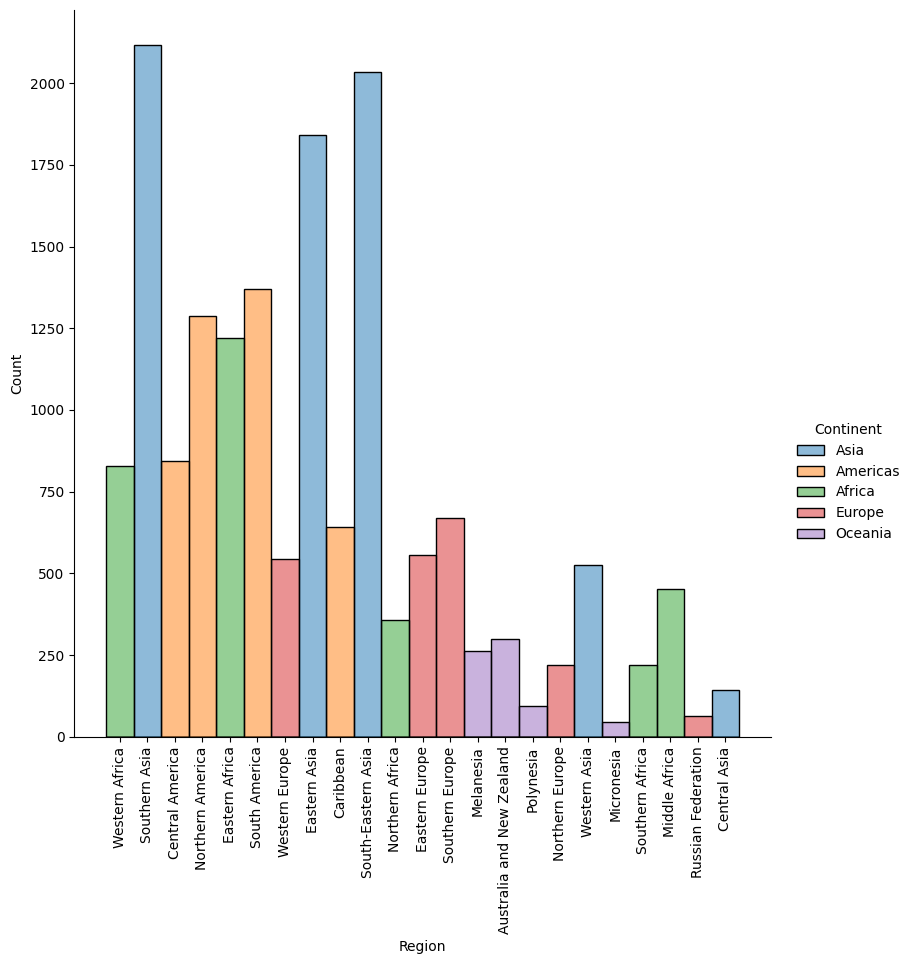

In [143]:

plt.figure(figsize=(10,6))
sns.displot(data=df, x='Region',  hue='Continent', hue_order=('Asia','Americas','Africa','Europe','Oceania'), palette='tab10', height=8)
plt.xticks(rotation=90)
;

### 1.7. CONTINENT

In [109]:
continent= df['Continent'].unique()
print('Continentes afectados por desastres:', continent)

print('Conteo de desastres por continente:\n\n', df['Continent'].value_counts())

Continentes afectados por desastres: ['Africa' 'Asia' 'Americas' 'Europe' 'Oceania']
Conteo de desastres por continente:

 Asia        6660
Americas    4144
Africa      3079
Europe      2054
Oceania      699
Name: Continent, dtype: int64


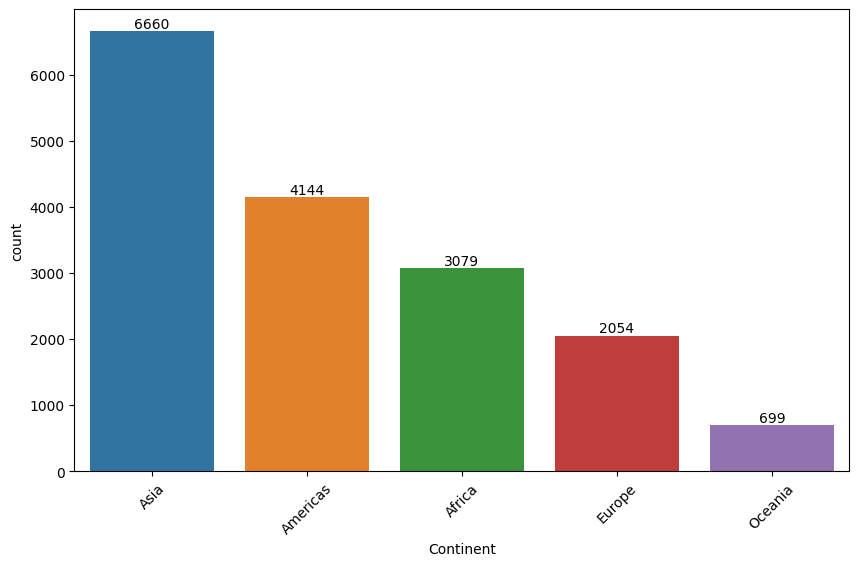

In [110]:
order = df['Continent'].value_counts(ascending=False).index
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df, x ='Continent', order=order)
ax.bar_label(ax.containers[0]); 
plt.xticks(rotation=45);


### 1.8. LOCATION

In [111]:
continent= df['Location'].unique()
print('Localizaciones afectados por desastres:', continent)

print('Conteo de desastres por localización:\n\n', df['Location'].value_counts())

Localizaciones afectados por desastres: ['Countrywide' 'Bengal' 'Quezaltenango, San Marcos' ...
 'Chikoma, Mbande, Mzigawa, Chipanji, Mlawe, Eastern, Luapula, Lusaka, Southern'
 'Sjenica and Brodarevo Novi Pazar Municipality; Novi Pazar Municipality (Sumadija and Western Serbia Region, south-western Serbia)'
 'Malakal (Upper Nile state)']
Conteo de desastres por localización:

 North                                                                                                                                    46
South                                                                                                                                    38
Countrywide                                                                                                                              34
Central                                                                                                                                  30
Taiwan Sheng province                                      

### 1.9. ESCALA DE MAGNITUD DE DESASTRE

In [112]:
dis_mag_scale = df['Dis Mag Scale'].unique()

print('Escalas de magnitud de desastres:', dis_mag_scale)

print('Conteo por escala de magnitud:\n\n', df['Dis Mag Scale'].value_counts())


Escalas de magnitud de desastres: ['Km2' 'Richter' nan 'Kph' 'Vaccinated' '?C']
Conteo por escala de magnitud:

 Km2           7067
Kph           4618
Richter       1597
Vaccinated    1518
?C             616
Name: Dis Mag Scale, dtype: int64


### 1.10. AÑO DE COMIENZO Y AÑO (PRÁCTICAMENTE ES LA MISMA VARIABLE)

In [113]:
start_year= df['Start Year'].unique()

print('Año de comienzo de desastre:', start_year)

print('Conteo de años de inicio de un desastre:\n\n', df['Start Year'].value_counts())

Año de comienzo de desastre: [1900 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1914 1915
 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929
 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943
 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957
 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1972 1971
 1970 1973 1974 1975 1976 1977 1978 1901 1913 1979 1983 1980 1982 1981
 1984 1985 1986 1987 1988 1989 1990 1992 1991 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
Conteo de años de inicio de un desastre:

 2000    525
2002    505
2005    483
2006    459
2007    447
       ... 
1904      4
1916      3
1908      3
1901      2
1921      2
Name: Start Year, Length: 124, dtype: int64


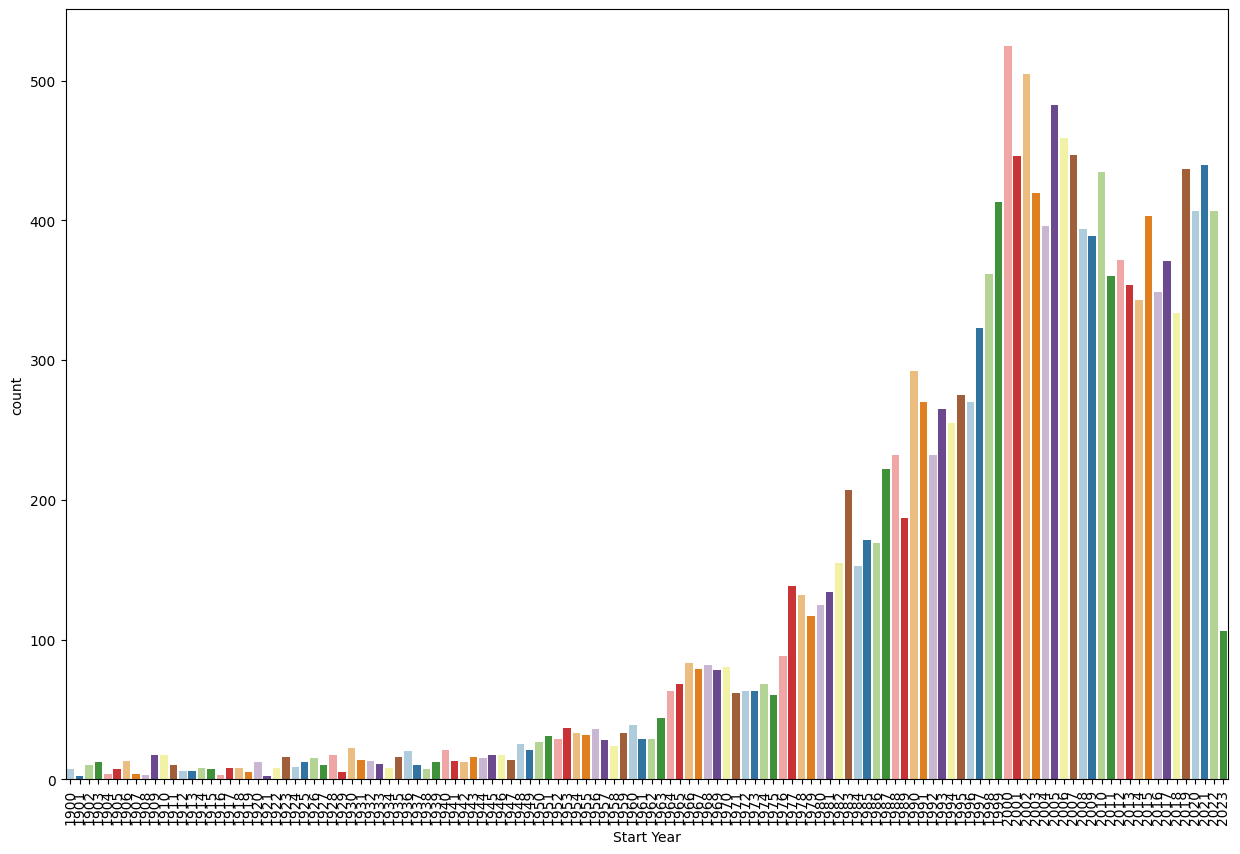

In [114]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='Start Year', palette='Paired')
plt.xticks(rotation=90);

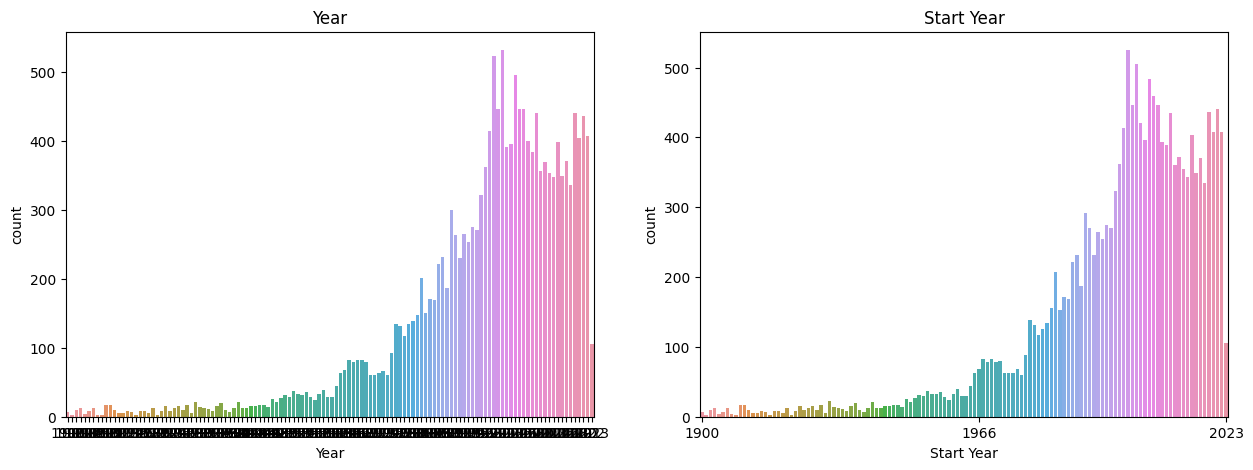

In [115]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.countplot(data=df, x= 'Year', ax=axes[0])
axes[0].set_title('Year')
plt.xticks([0,65,123],[1900,1966,2023])

sns.countplot(data=df, x= 'Start Year', ax=axes[1])
axes[1].set_title('Start Year')
plt.xticks([0,65,123],[1900,1966,2023]);


### 1.11. AÑO DE FINALIZACIÓN Y AÑO

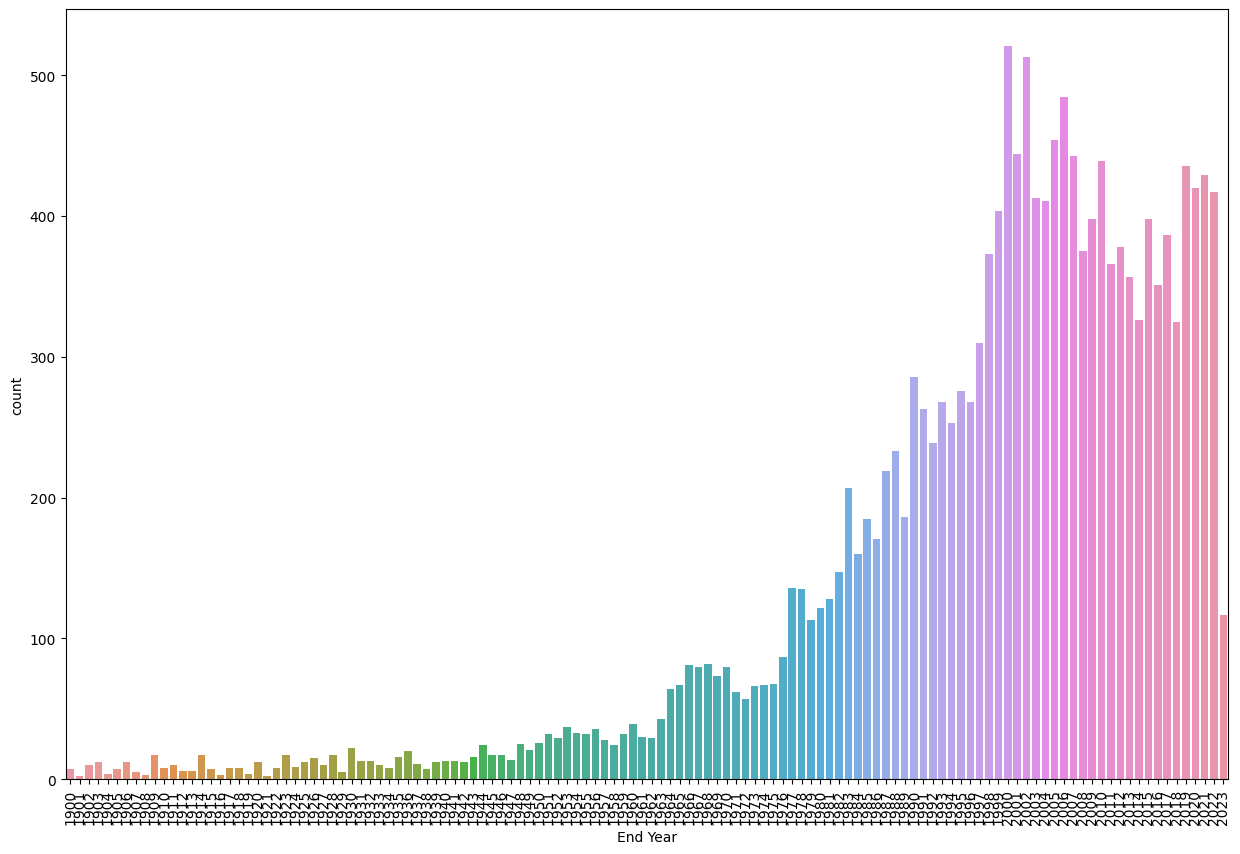

In [116]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='End Year')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Start Year')

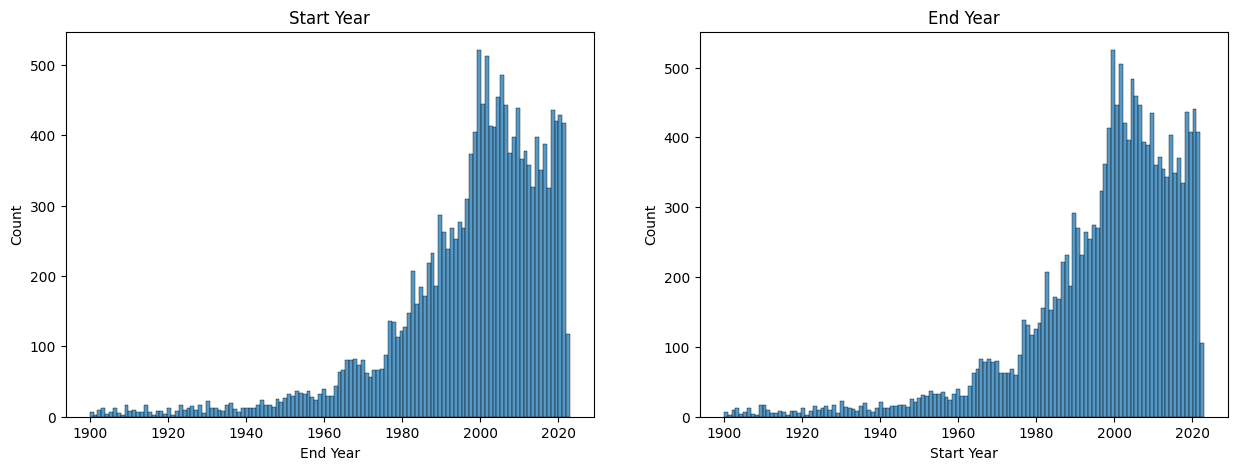

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.histplot(data=df, x= 'End Year', bins=124, ax=axes[0])
axes[1].set_title('End Year')

sns.histplot(data=df, x= 'Start Year', bins=124, ax=axes[1])
axes[0].set_title('Start Year')

Text(0.5, 1.0, 'Year')

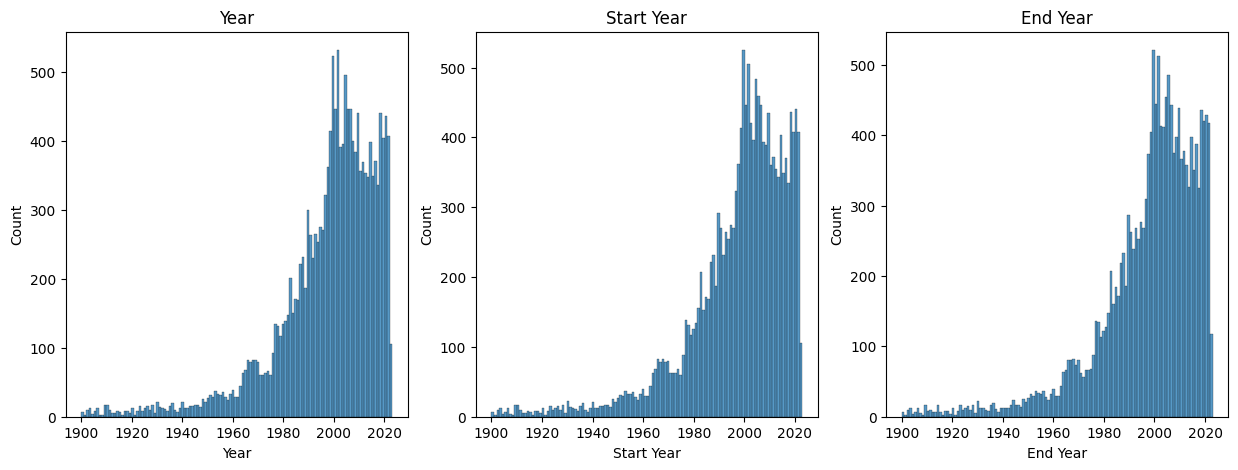

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(data=df, x= 'End Year', bins=124, ax=axes[2])
axes[2].set_title('End Year')

sns.histplot(data=df, x= 'Start Year',bins=124, ax=axes[1])
axes[1].set_title('Start Year')

sns.histplot(data=df, x= 'Year', bins=124, ax=axes[0])
axes[0].set_title('Year')

IMPORTANTE: ELIMINAR DISPLOT Y SUSTITUIR POR COUNTPLOT

### 1.12. MES DE COMIENZO DE DESASTRE

In [119]:
start_month = df['Start Month'].value_counts()
start_month

1.0     1817
8.0     1694
7.0     1693
9.0     1495
6.0     1353
10.0    1345
5.0     1255
4.0     1167
12.0    1155
11.0    1101
3.0     1083
2.0     1083
Name: Start Month, dtype: int64

<Axes: xlabel='Start Month'>

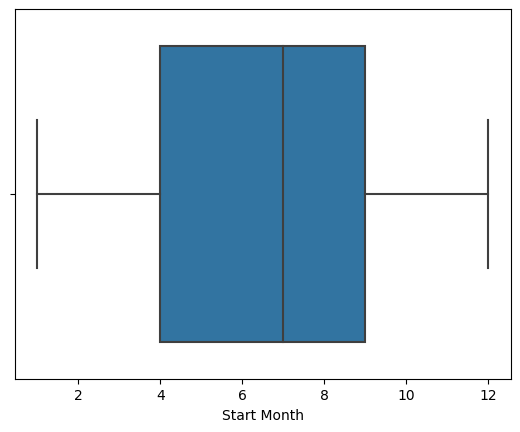

In [120]:
sns.boxplot(data=df, x='Start Month')

### 1.13. MES DE FINALIZACIÓN DE DESASTRE

In [121]:
end_month = df['End Month'].value_counts()
end_month

8.0     1745
7.0     1578
9.0     1558
1.0     1457
10.0    1369
6.0     1256
5.0     1255
12.0    1190
2.0     1141
4.0     1140
3.0     1125
11.0    1122
Name: End Month, dtype: int64

<Axes: xlabel='End Month'>

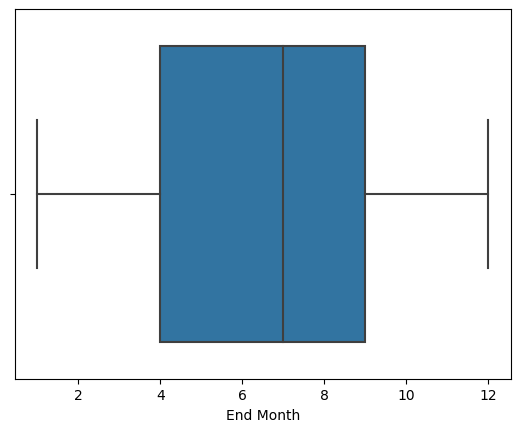

In [122]:
sns.boxplot(data=df, x='End Month')

Text(0.5, 1.0, 'Start Month')

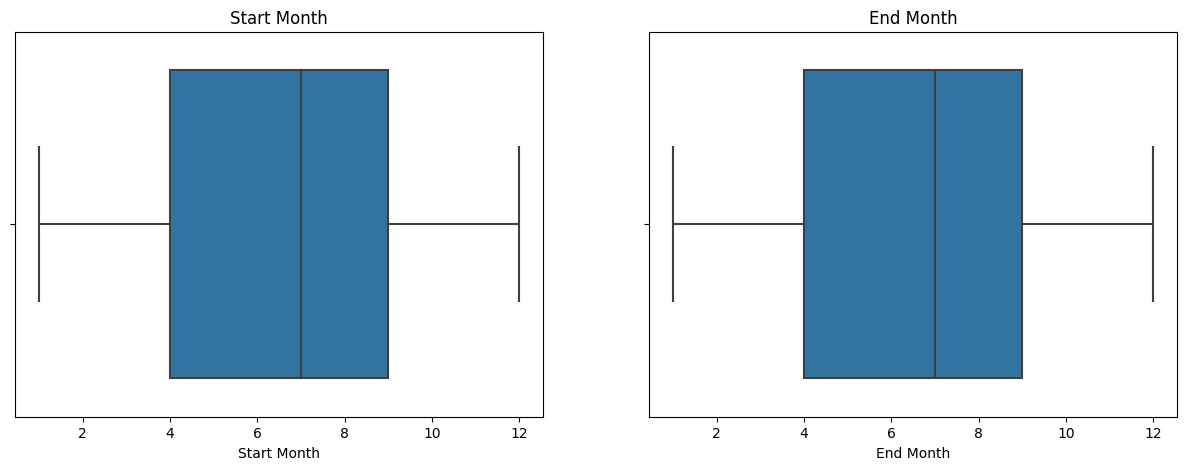

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(data=df, x= 'End Month', ax=axes[1])
axes[1].set_title('End Month')

sns.boxplot(data=df, x= 'Start Month', ax=axes[0])
axes[0].set_title('Start Month')

# 2. ANÁLISIS BIVARIANTE

## 2.1 Analisis de los subtipos de desastres que presenta cada desastre tipo

El subtipo permite afinar el tipo de desastre natural, p.e., cuando hablamos de inundación podemos concretar si es un desbordamiento de un río, una inundación relámpago tipo torrentera o rambla (flash flood) o una inundación costera (coastal flood)

In [124]:
m = df[['Disaster Type', 'Disaster Subtype']].groupby('Disaster Type').value_counts()
m

Disaster Type        Disaster Subtype                
Drought              Drought                              802
Earthquake           Ground movement                     1540
                     Tsunami                               57
Epidemic             Bacterial disease                    781
                     Viral disease                        544
                     Parasitic disease                     51
Extreme temperature  Cold wave                            310
                     Heat wave                            229
                     Severe winter conditions              77
Flood                Riverine flood                      2657
                     Flash flood                          822
                     Coastal flood                         85
Insect infestation   Locust                                67
                     Grasshopper                           16
                     Worms                                  3
Landslide       

IMPORTANTE: No coincide con el conteo por tipo de desastre, pero se debe a los nulos que hay en la columna Disaster Subtype. Sólo están completos los datos de Earthquake, Extreme Temperatures y Mass movement.

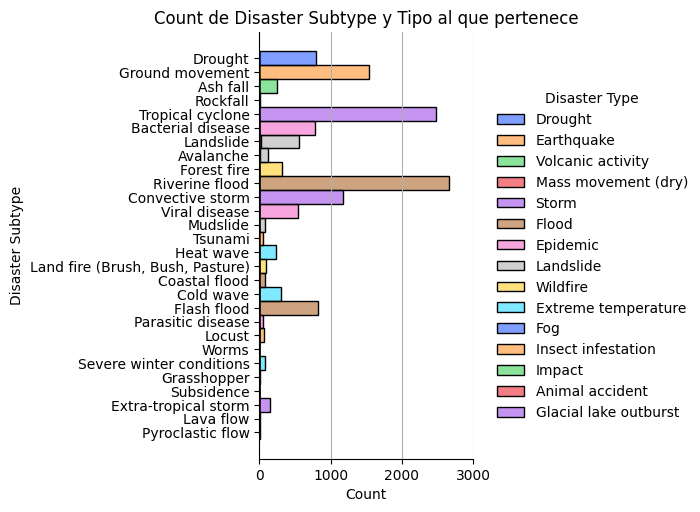

In [125]:
sns.displot (df, y ='Disaster Subtype', hue= 'Disaster Type', palette='bright')
plt.xlim(0, 3000)
plt.title('Count de Disaster Subtype y Tipo al que pertenece')
plt.grid(axis='x')

## 2.2 Análisis del Disaster Subgroup en función de cada país

In [126]:
m = df[['Country','Disaster Subgroup']].groupby('Country').value_counts()
m.sort_values(ascending=False).head(50)

Country                                 Disaster Subgroup
United States of America (the)          Meteorological       753
China                                   Hydrological         390
Philippines (the)                       Meteorological       382
India                                   Hydrological         370
China                                   Meteorological       335
Indonesia                               Hydrological         331
India                                   Meteorological       268
United States of America (the)          Hydrological         211
China                                   Geophysical          210
Indonesia                               Geophysical          209
Bangladesh                              Meteorological       208
Japan                                   Meteorological       208
Brazil                                  Hydrological         199
Philippines (the)                       Hydrological         193
Colombia                        

Esta agrupación permite saber por cada país los subgrupos que han sufrido y su conteo

In [127]:
m = df[['Country','Disaster Subgroup']].groupby('Country').value_counts()
m

Country      Disaster Subgroup
Afghanistan  Hydrological         130
             Geophysical           36
             Biological            21
             Meteorological        17
             Climatological         9
                                 ... 
Zambia       Climatological         7
Zimbabwe     Biological            24
             Hydrological          13
             Meteorological        10
             Climatological         9
Length: 851, dtype: int64

Esta agrupación permite ver subgrupos y su conteo en cada país

In [128]:
m = df[['Country','Disaster Subgroup']].groupby('Country').describe()
m['Disaster Subgroup'].sort_values(by='count', ascending=False).head(50)

,count,unique,top,freq
Country,,,,
United States of America (the),1131,5,Meteorological,753
China,994,5,Hydrological,390
India,760,5,Hydrological,370
Philippines (the),684,5,Meteorological,382
Indonesia,610,5,Hydrological,331
Japan,381,5,Meteorological,208
Bangladesh,359,5,Meteorological,208
Mexico,302,5,Meteorological,141
Brazil,273,5,Hydrological,199


Esta tabla está ordenada por países que sufren un mayor número de desastres naturales indicando el mayor subgrupo de desastres que sufren de los 6 que hay y  su conteo

<Figure size 1000x600 with 0 Axes>

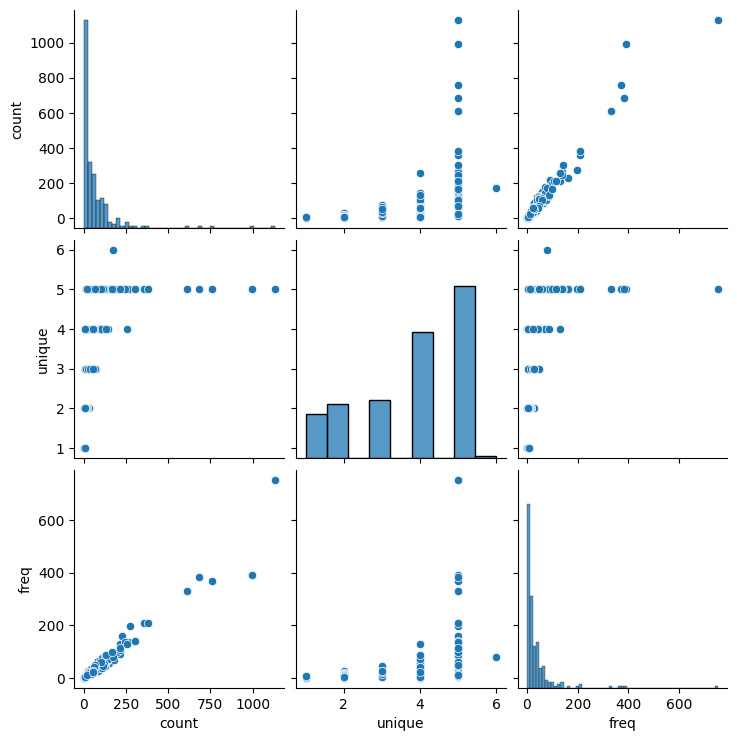

In [129]:
m = df[['Country','Disaster Subgroup']].groupby('Country').describe()
plt.figure(figsize=(10,6))
sns.pairplot(m['Disaster Subgroup']);

In [130]:
disaster_subgroup_continent = df.groupby('Continent')['Disaster Subgroup'].value_counts()
disaster_subgroup_continent

Continent  Disaster Subgroup
Africa     Hydrological         1276
           Biological            975
           Climatological        397
           Meteorological        332
           Geophysical            99
Americas   Meteorological       1612
           Hydrological         1554
           Geophysical           434
           Climatological        357
           Biological            187
Asia       Hydrological         2841
           Meteorological       2118
           Geophysical          1068
           Biological            372
           Climatological        261
Europe     Meteorological        848
           Hydrological          763
           Geophysical           219
           Climatological        173
           Biological             50
           Extra-terrestrial       1
Oceania    Meteorological        325
           Hydrological          178
           Geophysical            92
           Climatological         74
           Biological             30
Name: Dis

In [131]:
df_year_continent = df.groupby (['Year', 'Continent'])['Disaster Type'].value_counts()

df_year_continent

Year  Continent  Disaster Type
1900  Africa     Drought          1
      Americas   Epidemic         1
                 Flood            1
                 Storm            1
      Asia       Drought          1
                                 ..
2023  Asia       Wildfire         1
      Europe     Flood            2
      Oceania    Storm            4
                 Earthquake       1
                 Flood            1
Name: Disaster Type, Length: 2369, dtype: int64

In [132]:
disaster_type_scale = df.groupby('Dis Mag Scale')['Disaster Type'].value_counts()
disaster_type_scale

Dis Mag Scale  Disaster Type      
?C             Extreme temperature     616
Km2            Flood                  5808
               Drought                 803
               Wildfire                456
Kph            Storm                  4618
Richter        Earthquake             1597
Vaccinated     Epidemic               1518
Name: Disaster Type, dtype: int64

## ESTUDIO DE TERREMOTOS

In [133]:
filter = df['Disaster Type'] == 'Earthquake'
df_earthquake = df[filter]
df_earthquake.head()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,AID Contribution,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,End Year,End Month,CPI
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,NaN,8.0,Richter,14,-91,1902,4.0,1902,4.0,"2,963047785"
9,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,NaN,8.0,Richter,32.04,76.16,1905,4.0,1905,4.0,"3,077011162"
10,1906-0014-CHL,1906,14,Geophysical,Earthquake,Ground movement,Chile,CHL,South America,Americas,...,NaN,8.0,Richter,33.05,71.4,1906,8.0,1906,8.0,"3,077011162"
11,1906-0002-COL,1906,2,Geophysical,Earthquake,Ground movement,Colombia,COL,South America,Americas,...,NaN,9.0,Richter,1.51 N,78.46 W,1906,1.0,1906,1.0,"3,077011162"
15,1907-0006-CHN,1907,6,Geophysical,Earthquake,Ground movement,China,CHN,Eastern Asia,Asia,...,NaN,7.0,Richter,38.5,69.9,1907,10.0,1907,10.0,"3,190974538"


In [134]:
df_earthquake.isnull().sum()

Dis No                  0
Year                    0
Seq                     0
Disaster Subgroup       0
Disaster Type           0
Disaster Subtype        0
Country                 0
ISO                     0
Region                  0
Continent               0
Location               40
Origin               1576
Associated Dis       1255
Associated Dis2      1558
OFDA Response        1395
Appeal               1330
Declaration          1311
AID Contribution     1482
Dis Mag Value          89
Dis Mag Scale           0
Latitude               50
Longitude              50
Start Year              0
Start Month             2
End Year                0
End Month               2
CPI                    17
dtype: int64

In [135]:
df_earthquake['Disaster Type'].value_counts()

Earthquake    1597
Name: Disaster Type, dtype: int64

In [146]:
df_earthquake['Disaster Subtype'].value_counts()

Ground movement    1540
Tsunami              57
Name: Disaster Subtype, dtype: int64

In [138]:
a = df_earthquake.groupby('Country')['Disaster Type'].value_counts().sort_values(ascending=False)
a.head(50)

Country                                 Disaster Type
China                                   Earthquake       203
Indonesia                               Earthquake       145
Iran (Islamic Republic of)              Earthquake       137
Turkey                                  Earthquake       114
Japan                                   Earthquake        70
Peru                                    Earthquake        57
Mexico                                  Earthquake        45
United States of America (the)          Earthquake        45
Greece                                  Earthquake        44
Italy                                   Earthquake        44
Philippines (the)                       Earthquake        42
Pakistan                                Earthquake        36
Afghanistan                             Earthquake        36
Taiwan (Province of China)              Earthquake        33
Colombia                                Earthquake        30
Chile                          

In [141]:
a.sum()

1597

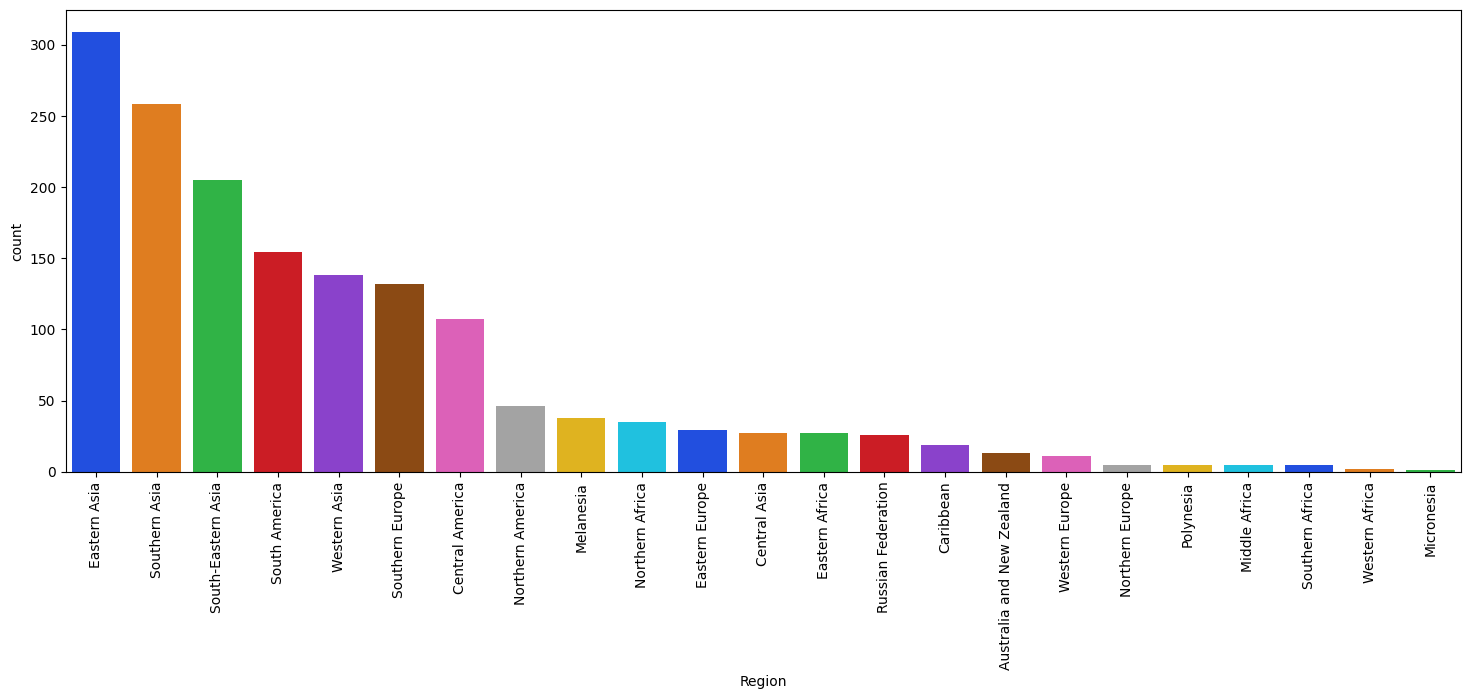

In [145]:
order = df_earthquake['Region'].value_counts(ascending=False).index
plt.figure(figsize=(18,6))
sns.countplot(data=df_earthquake, x='Region', palette='bright', order=order)
plt.xticks(rotation=90);

In [149]:
df_earthquake.groupby('Country')['Dis Mag Value'].value_counts().sort_values(ascending=False)

Country                     Dis Mag Value
China                       6.0              87
Iran (Islamic Republic of)  6.0              63
China                       5.0              62
Indonesia                   7.0              51
                            6.0              46
                                             ..
Iraq                        7.0               1
Israel                      6.0               1
Italy                       8.0               1
Jamaica                     7.0               1
Yugoslavia                  7.0               1
Name: Dis Mag Value, Length: 299, dtype: int64

In [151]:
df_earthquake.groupby('Country')['Dis Mag Value'].value_counts().argmax('Dis Mag Value')

TypeError: '>=' not supported between instances of 'str' and 'int'